If the sklearn library is not installed then install it using the command below

In [ ]:
!pip install scikit-learn

In [19]:
from sklearn import datasets
digits = datasets.load_digits()

dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [30]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [28]:
print(digits.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [26]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [20]:
print(digits.data.shape)

(1797, 64)


The image size is 8x8 so 64 pixel in total and the dataset contains 1797 total images.

In [21]:
print(digits.images[2])

[[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]


In [22]:
import matplotlib.pyplot as plt
# defining the function plot_multi
 
def plot_multi(i):
    nplots = 16
    fig = plt.figure(figsize=(15, 15))
    for j in range(nplots):
        plt.subplot(4, 4, j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    # printing the each digits in the dataset.
    plt.show()
 
    

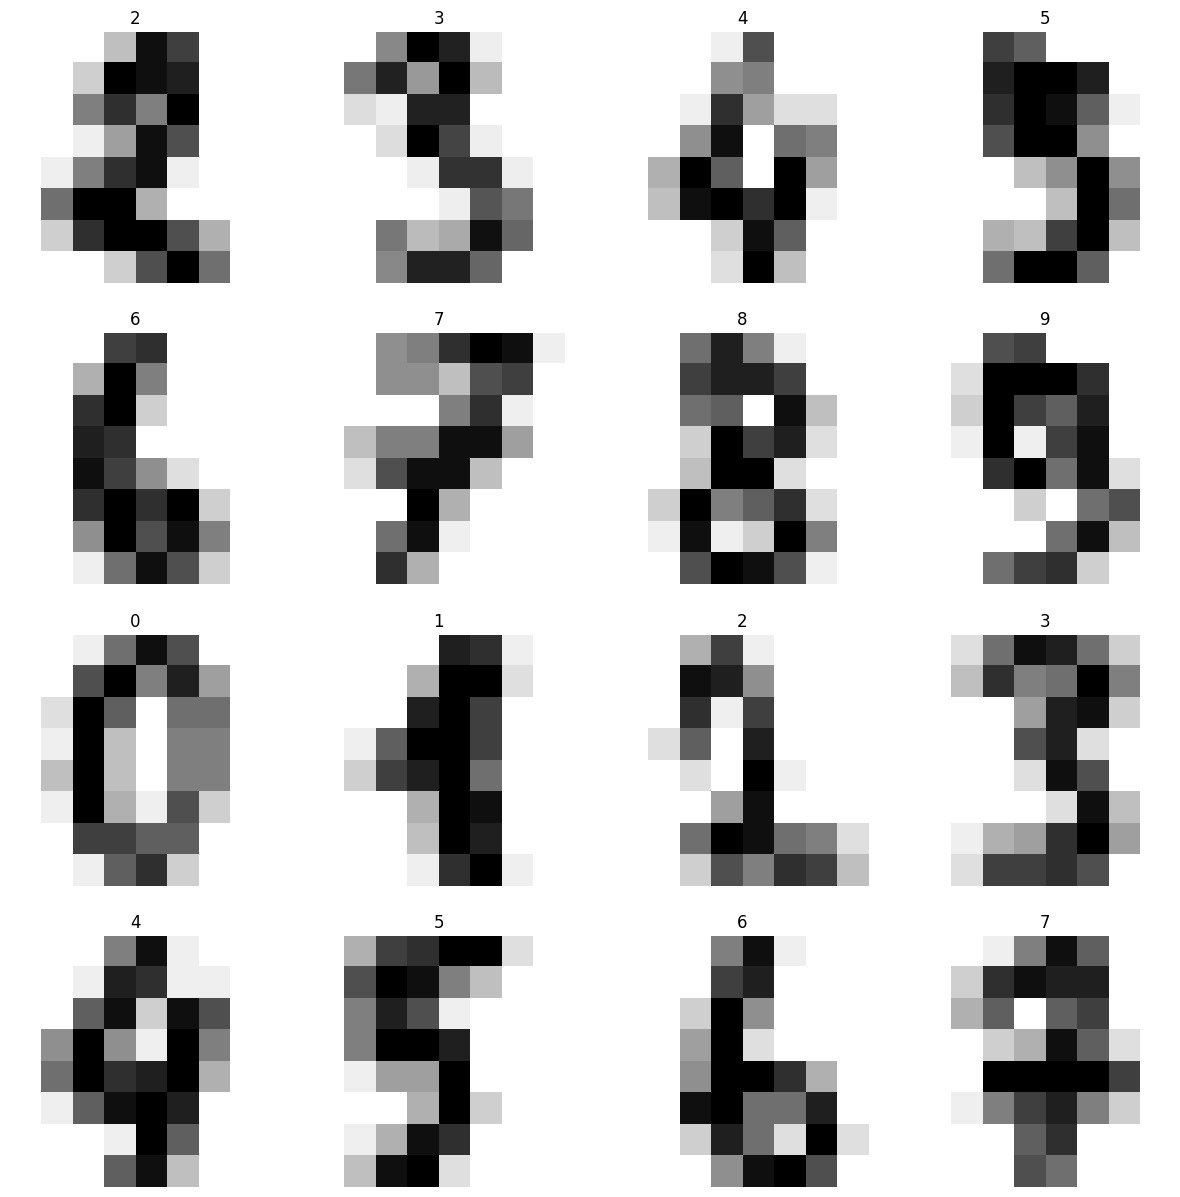

In [24]:
plot_multi(2)

Converting Data for our network. We have data size of 8X8 so 64 total values in  single image. That will be our input value.

In [25]:
y = digits.target #Output
x = digits.images.reshape((len(digits.images), -1)) #Input
 
# gives the  shape of the data
x.shape

(1797, 64)

In [35]:
print(digits.images[2]) #Old Shape

[[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]


In [34]:
x[2] #New Shape 

array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
       14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
        1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
        0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
       16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.])

Spliting of Data. We want our data to be split and broken into two main parts: Train Part and Test Part

In [46]:
from sklearn.model_selection import train_test_split #Splitting the data for training and testing using Sklearn

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [47]:
print(x_train.shape)
print(x_test.shape)

(1347, 64)
(450, 64)


In [48]:

# Very first 1000 photographs and
# labels will be used in training.
x_train = x[:1000]
y_train = y[:1000]
 
# The leftover dataset will be utilised to
# test the network's performance later on.
x_test = x[1000:]
y_test = y[1000:]

In [49]:
print(x_train.shape)
print(x_test.shape)

(1000, 64)
(797, 64)


In [83]:
from sklearn.neural_network import MLPClassifier
 
# calling the MLP classifier with specific parameters
mlp = MLPClassifier(hidden_layer_sizes=(20,),
                    activation='logistic',
                    alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=1,
                    learning_rate_init=.1,
                    verbose=True,shuffle=True)

In [84]:
mlp.fit(x_train, y_train)

Iteration 1, loss = 2.18188670
Iteration 2, loss = 1.78159624
Iteration 3, loss = 1.41188236
Iteration 4, loss = 1.08011675
Iteration 5, loss = 0.80575826
Iteration 6, loss = 0.60341854
Iteration 7, loss = 0.45946540
Iteration 8, loss = 0.36179280
Iteration 9, loss = 0.29183589
Iteration 10, loss = 0.24398349
Iteration 11, loss = 0.21066656
Iteration 12, loss = 0.18146515
Iteration 13, loss = 0.16267628
Iteration 14, loss = 0.14575656
Iteration 15, loss = 0.13437322
Iteration 16, loss = 0.12046377
Iteration 17, loss = 0.11051537
Iteration 18, loss = 0.10277270
Iteration 19, loss = 0.09604248
Iteration 20, loss = 0.09005559
Iteration 21, loss = 0.08578979
Iteration 22, loss = 0.07979800
Iteration 23, loss = 0.07548412
Iteration 24, loss = 0.07158518
Iteration 25, loss = 0.06875418
Iteration 26, loss = 0.06618870
Iteration 27, loss = 0.06258595
Iteration 28, loss = 0.06010764
Iteration 29, loss = 0.05854404
Iteration 30, loss = 0.05616371
Iteration 31, loss = 0.05404184
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(20,),
              learning_rate_init=0.1, random_state=1, solver='sgd',
              verbose=True)

Plotting of Results

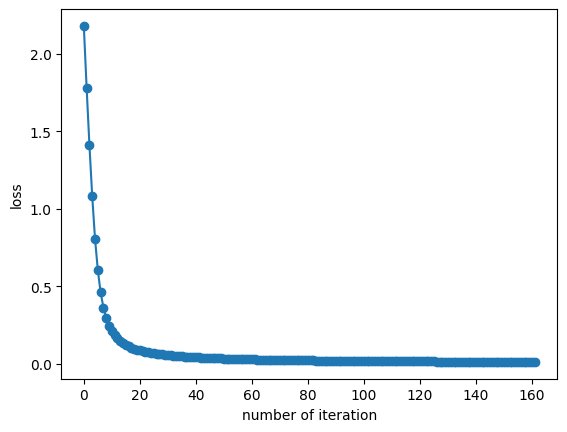

In [78]:
fig, axes = plt.subplots(1, 1)
axes.plot(mlp.loss_curve_, 'o-')
axes.set_xlabel("number of iteration")
axes.set_ylabel("loss")
plt.show()

In [81]:
mlpo = MLPClassifier(hidden_layer_sizes=(20,),
                    activation='relu',
                    alpha=1e-4, solver='adam',
                    tol=1e-4, random_state=1,
                    learning_rate_init=.1,
                    verbose=True, shuffle=True)

In [82]:
mlpo.fit(x_train, y_train)

Iteration 1, loss = 11.42326422
Iteration 2, loss = 2.32922675
Iteration 3, loss = 1.98829257
Iteration 4, loss = 1.90664747
Iteration 5, loss = 1.82335616
Iteration 6, loss = 1.75391959
Iteration 7, loss = 1.70159090
Iteration 8, loss = 1.67999577
Iteration 9, loss = 1.63062908
Iteration 10, loss = 1.58445953
Iteration 11, loss = 1.58963586
Iteration 12, loss = 1.58114508
Iteration 13, loss = 1.58436936
Iteration 14, loss = 1.56651382
Iteration 15, loss = 1.55161509
Iteration 16, loss = 1.54981941
Iteration 17, loss = 1.52310923
Iteration 18, loss = 1.49265043
Iteration 19, loss = 1.43609069
Iteration 20, loss = 1.41441962
Iteration 21, loss = 1.39771582
Iteration 22, loss = 1.38244584
Iteration 23, loss = 1.35701345
Iteration 24, loss = 1.37890166
Iteration 25, loss = 1.35312749
Iteration 26, loss = 1.35212527
Iteration 27, loss = 1.34572549
Iteration 28, loss = 1.35024356
Iteration 29, loss = 1.37869274
Iteration 30, loss = 1.29083790
Iteration 31, loss = 1.32316886
Iteration 32, lo

MLPClassifier(hidden_layer_sizes=(20,), learning_rate_init=0.1, random_state=1,
              verbose=True)

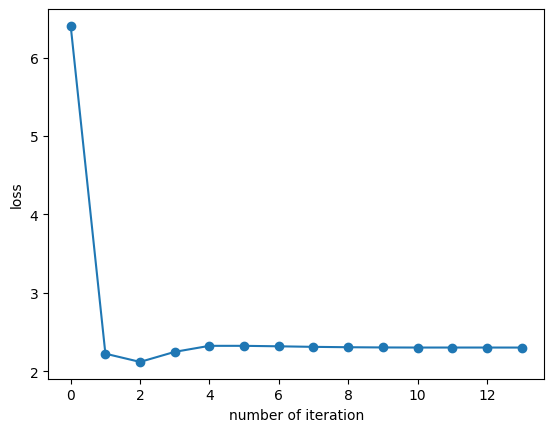

In [70]:
fig, axes = plt.subplots(1, 1)
axes.plot(mlpo.loss_curve_, 'o-')
axes.set_xlabel("number of iteration")
axes.set_ylabel("loss")
plt.show()

How to make Predictions?


In [95]:

predictions = mlp.predict(x_test)
predictions[:10]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7])

In [96]:

predictions_new = mlpo.predict(x_test)
predictions_new[:10]

array([6, 4, 6, 6, 3, 6, 5, 6, 6, 7])

In [97]:
y_test[:10]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7])

How to get Accuracy?

In [100]:
from sklearn.metrics import accuracy_score
 
# calculating the accuracy with y_test and predictions
print(accuracy_score(y_test, predictions))
print(accuracy_score(y_test, predictions_new))

0.93099121706399
0.45796737766624845


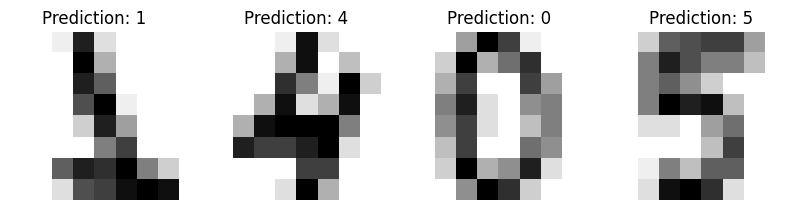

In [101]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, x_test, predictions):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

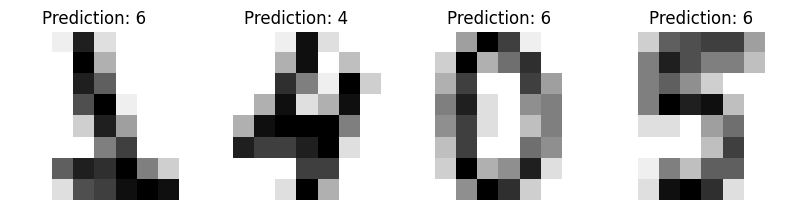

In [102]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, x_test, predictions_new):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

Thats All